In [159]:
import numpy as np
import pandas as pd
import seaborn as srs
import matplotlib.pyplot as plt

In [160]:
pengu = pd.read_csv('penguins_size.csv')
pengu.head() #prints first 5 rows of dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [161]:
pengu.isnull()
#check how many values are null

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [163]:
pengu = pengu.dropna() #drop all the null values

In [164]:
#store all but last col in x and last col in y
#OneHotEncoder().fit_transform(pengu)

X = pengu.iloc[:,:-1]
Y = pengu['sex']

In [165]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['species', 'island'], dtype='object')


In [166]:
le = LabelEncoder()

for i in objList:
    X[i] = le.fit_transform(X[i].astype(str))
#labelencoding all string values to float in X for model
print (X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int32  
 1   island             334 non-null    int32  
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
dtypes: float64(4), int32(2)
memory usage: 15.7 KB
None


C:\Users\91877\AppData\Local\Temp\ipykernel_1928\3969377859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  srs.heatmap(pengu.corr(), annot=True, ax=ax)


<AxesSubplot:>

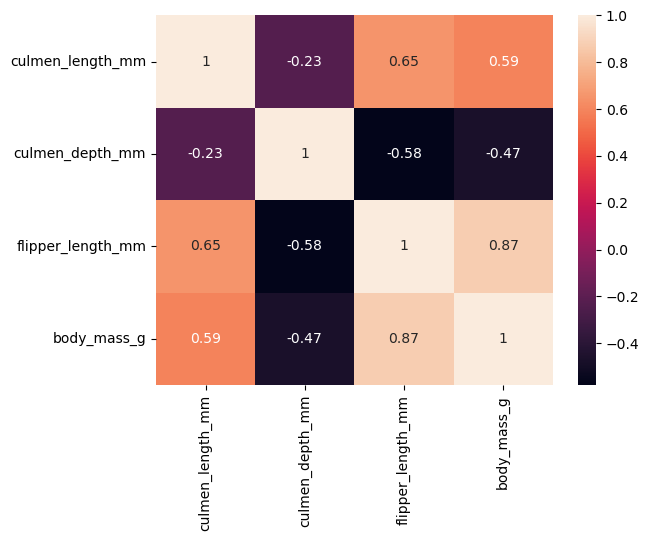

In [167]:
fig, ax = plt.subplots()
srs.heatmap(pengu.corr(), annot=True, ax=ax)

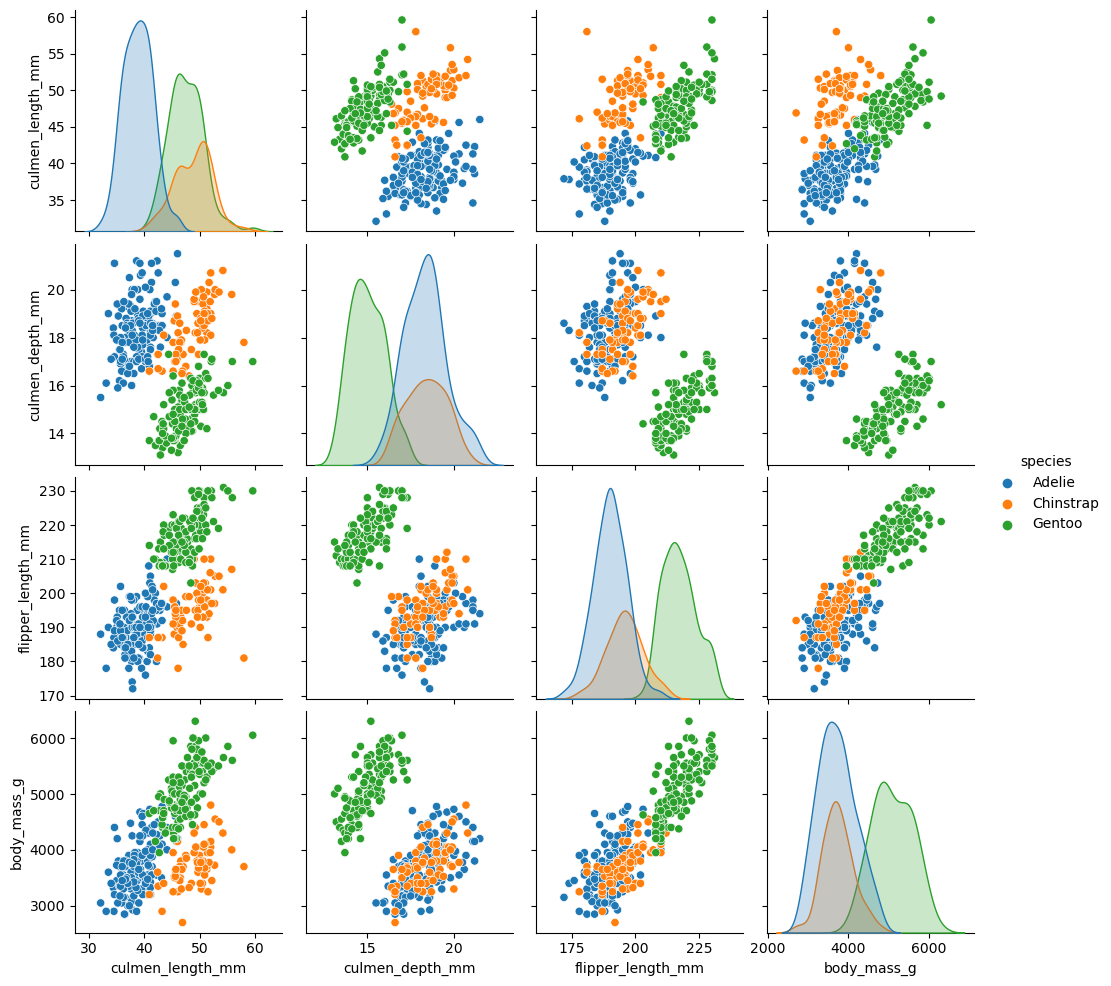

In [168]:
import seaborn as srs
srs.pairplot(pengu, hue='species')


In [169]:
#splitting the data into training and test sets with 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
DT1 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_split = 3, random_state = 100)
DT1.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=100)

In [172]:
ypred = DT1.predict(X_test)
DT1.score(X_train,Y_train)  #model score

0.9055793991416309

In [173]:
from sklearn.metrics import confusion_matrix , classification_report
#The confusion matrix for predictions vs test cases
print("confusion matrix: \n",confusion_matrix(Y_test,ypred),end="\n")
print("classification report:\n",classification_report(Y_test,ypred))

confusion matrix: 
 [[49  4]
 [ 9 39]]
classification report:
               precision    recall  f1-score   support

      FEMALE       0.84      0.92      0.88        53
        MALE       0.91      0.81      0.86        48

    accuracy                           0.87       101
   macro avg       0.88      0.87      0.87       101
weighted avg       0.87      0.87      0.87       101



In [174]:
from sklearn.tree import plot_tree #to plot the decision tree
l1 =list(X.columns)
l2 = list(set(Y))

Decision Tree View: 



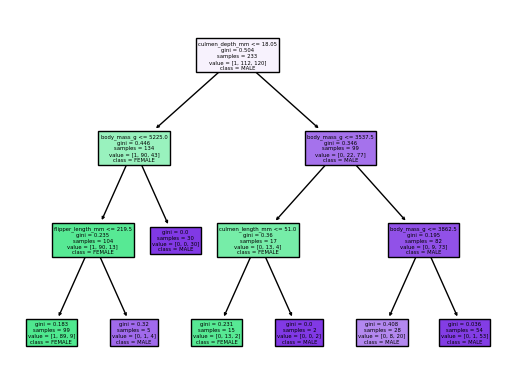

In [175]:
plot_tree(DT1,feature_names = l1,class_names = l2,filled =True)
print("Decision Tree View: \n")
plt.show()

## PENGUINS IN A RANDOM FOREST


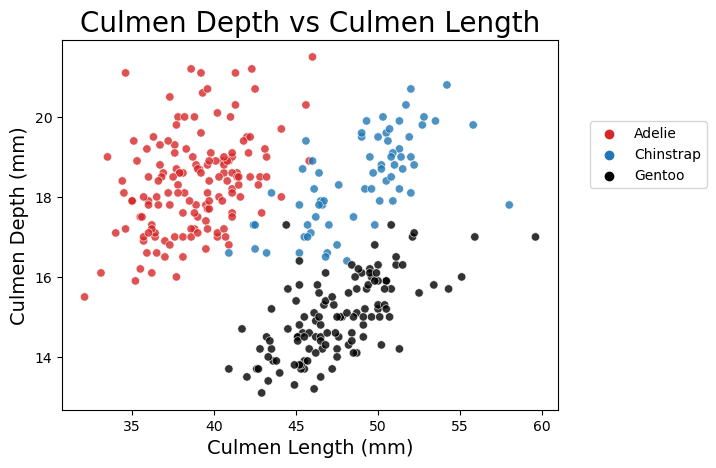

In [225]:

plt.figure()

palette = ["tab:red", "tab:blue", "black"]
srs.scatterplot(data=pengu, x = 'culmen_length_mm', y = 'culmen_depth_mm', 
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('Culmen Length (mm)', fontsize=14)
plt.ylabel('Culmen Depth (mm)', fontsize=14)
plt.title('Culmen Depth vs Culmen Length', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.show()

In [177]:
features = ['culmen_length_mm', 'culmen_depth_mm'] 
X = pengu[features]
y = pengu['species']

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [179]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None)
forest.fit(X_train, y_train) #fit the random forest to the training data
forest_preds = forest.predict(X_test) #make predictions off of the test data

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        44
   Chinstrap       1.00      0.86      0.92        28
      Gentoo       0.97      1.00      0.99        39

    accuracy                           0.96       111
   macro avg       0.97      0.95      0.96       111
weighted avg       0.97      0.96      0.96       111



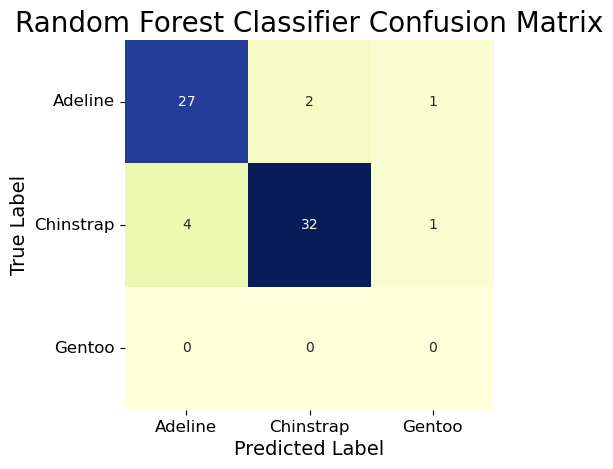

In [224]:

plt.figure()

labels = ['Adeline', 'Chinstrap', 'Gentoo']

con_matrix = confusion_matrix(y_test, forest_preds)
srs.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=20)
plt.show()

# LightGBM library

In [228]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [229]:
# set up the LightGBM classifier with some initial parameters
params = {
    'objective': 'binary',
    'boosting_type': 'rf',
    'subsample': 0.8,
    'subsample_freq': 1,
    'num_leaves': 10,
    'min_data': 1,
    'max_depth': 5,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_fraction': 0.5,
    'learning_rate': 0.01,
    'verbose': 1
}

In [230]:
# create the LightGBM classifier and fit it to the training data
forest = lgb.LGBMClassifier(**params)
forest.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] A

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, boosting_type='rf',
               feature_fraction=0.5, learning_rate=0.01, max_depth=5,
               min_data=1, num_leaves=10, objective='binary', subsample=0.8,
               subsample_freq=1, verbose=1)

In [231]:
# create and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[27  2  1]
 [ 4 32  1]
 [ 0  0  0]]


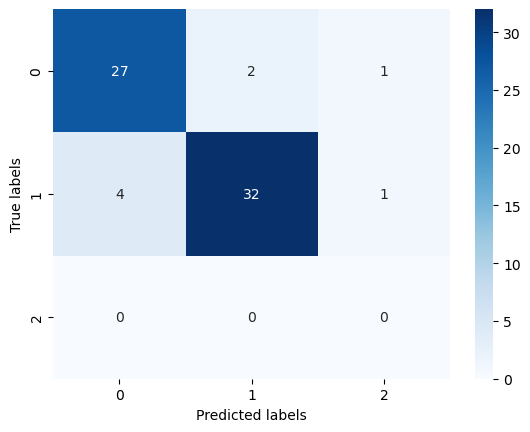

In [232]:
# visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [233]:
from sklearn.metrics import classification_report, confusion_matrix

# make predictions on the test data and evaluate the model
y_pred = forest.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

# print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8805970149253731
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.94      0.86      0.90        37
           2       0.00      0.00      0.00         0

    accuracy                           0.88        67
   macro avg       0.60      0.59      0.60        67
weighted avg       0.91      0.88      0.89        67



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
